In [1]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
%matplotlib inline
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

In [2]:
# To keep things simple, we will construct an artificial dataset 
# according to a linear model with additive noise. 
#
# We generate a dataset containing 1000 samples, each consisting of 2
# features sampled from a standard normal distribution
# The "feature matrix" will be a 1000x2 matrix (each row is a sample)

def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b                       # This is the "exact" target value
    y += np.random.normal(0, 0.01, y.shape)    # We DISTORTS the exact value with noise
    return X, y.reshape((-1, 1))

In [7]:
#######################################################################
# My notes
#######################################################################

# Let's see what each statement does...

X=np.random.normal(0,     1,    (10,        2))
#                 mean   stdv   #samples   #feasures
X

array([[-1.4749662 ,  1.5194443 ],
       [-0.52414197,  1.9040878 ],
       [ 1.2662556 , -1.5734432 ],
       [ 0.8950642 , -0.14007865],
       [-0.6015945 ,  0.29670078],
       [ 1.2040559 ,  1.3111951 ],
       [-0.9712193 ,  0.5035904 ],
       [-0.58256227, -1.189445  ],
       [ 0.3717077 , -0.5502137 ],
       [ 0.9300072 , -1.5918756 ]])

In [10]:
w = np.array([1,1])
y = np.dot(X, w) + 0     # This is the exact target value (I used b = 0)
y

array([ 0.04447818,  1.3799458 , -0.30718756,  0.7549855 , -0.30489373,
        2.5152512 , -0.4676289 , -1.7720072 , -0.17850599, -0.66186833])

In [11]:
y.shape

(10,)

In [12]:
y += np.random.normal(0, 0.01, y.shape)  # Add some random noise
y

# OK, the job is to find the weights w (approximately) that we HAD used !!! 

array([ 0.03025242,  1.3688638 , -0.31236374,  0.7557727 , -0.28480542,
        2.5060656 , -0.46476582, -1.7794644 , -0.17290139, -0.6739492 ])

In [13]:
# In the test, we use w=[2,-3.4] and b=4.2

true_w = np.array([2, -3.4])
true_b = 4.2

# We generate the synthetic data:
features, labels = synthetic_data(true_w, true_b, 1000)

In [14]:
features # 1000 samples of the (2) features

array([[ 0.96975976,  1.8140212 ],
       [-0.52853745, -1.5227431 ],
       [-1.88909   , -2.515245  ],
       ...,
       [-0.52475417, -0.77108765],
       [-0.5240428 ,  0.60424817],
       [-0.8164095 ,  0.4725901 ]])

In [18]:
np.dot(features,true_w) # these are the TRUE values


array([-4.22815275e+00,  4.12025166e+00,  4.77365303e+00,  5.91635323e+00,
        2.34581971e+00,  3.11472559e+00, -6.38114452e+00,  2.36199546e+00,
        6.89828014e+00,  3.17651081e+00, -2.21119452e+00,  1.26673346e+01,
       -9.50165081e+00,  1.69495797e+00,  2.29048681e+00,  6.04447985e+00,
        3.16304636e+00,  2.69883680e+00,  2.10026026e+00, -4.89375782e+00,
        1.48212302e+00,  6.04083252e+00,  1.53641725e+00, -2.09651208e+00,
       -1.44621146e+00,  3.15869629e-01,  3.75536561e+00, -1.20397225e-01,
        1.05415070e+00,  3.34472394e+00, -4.69854450e+00, -4.58484793e+00,
       -4.78156757e+00,  5.40270948e+00, -5.23104668e+00, -1.90859628e+00,
        4.38864803e+00, -8.43848419e+00,  1.07175779e+00,  4.42948341e-01,
        1.46858549e+00, -7.78305054e-01,  2.95412612e+00, -2.54502964e+00,
        4.61471033e+00, -4.98990440e+00,  6.53889370e+00, -2.39446783e+00,
       -6.04667091e+00, -4.17788649e+00, -2.49250889e+00,  6.13471651e+00,
       -7.97227287e+00,  

In [19]:
labels  # These are the OBSERVED values

array([[-2.50356570e-02],
       [ 8.32484627e+00],
       [ 8.97640324e+00],
       [ 1.01313639e+01],
       [ 6.54594612e+00],
       [ 7.31666708e+00],
       [-2.19672084e+00],
       [ 6.57486629e+00],
       [ 1.11068640e+01],
       [ 7.37284565e+00],
       [ 1.98388314e+00],
       [ 1.68727398e+01],
       [-5.30382013e+00],
       [ 5.90552568e+00],
       [ 6.49156857e+00],
       [ 1.02477493e+01],
       [ 7.36392021e+00],
       [ 6.89161587e+00],
       [ 6.29769516e+00],
       [-6.87733352e-01],
       [ 5.69209814e+00],
       [ 1.02340832e+01],
       [ 5.72429228e+00],
       [ 2.10557055e+00],
       [ 2.75711536e+00],
       [ 4.49074936e+00],
       [ 7.94405699e+00],
       [ 4.08633375e+00],
       [ 5.24010801e+00],
       [ 7.53952360e+00],
       [-4.97032106e-01],
       [-3.69195282e-01],
       [-5.83364666e-01],
       [ 9.63666821e+00],
       [-1.03078008e+00],
       [ 2.27371812e+00],
       [ 8.58078003e+00],
       [-4.24475336e+00],
       [ 5.2

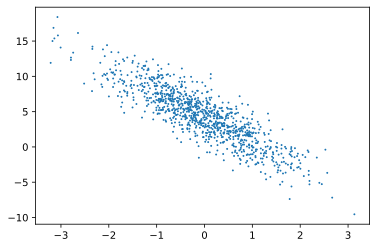

In [25]:
# By generating a scatter plot using the second feature features[:, 1] and labels, 
# we can clearly observe the linear correlation between the two.

d2l.set_figsize([6,4])
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);
#                          ^^^^^ Change this to 0 to see feature0 relating to labels

In [41]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))     # indices=(0,1,2,..., num_examples-1)
    
    # The examples are read at random, in no particular order
    random.shuffle(indices)                 # indiices=(randomized 0,1,2,...)
    
    for i in range(0, num_examples, batch_size):   # i = 0, batch_size, 2*batch_size, ...
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
                                     # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                     # This is a slice [i to min(i+batch_size, num_examples)]
    yield features[batch_indices], labels[batch_indices]
             # yield is return, but retains the STATE !!!
             # Next function call will continue from the yield statement !!!

In [42]:
#######################################################################
# My notes
#######################################################################

# These statements shows how the "data_iter()" works:

indices=list(range(20))  # Randomize  num_examples  number of indices
random.shuffle(indices)
indices

[7, 8, 6, 13, 12, 19, 18, 10, 9, 0, 14, 1, 2, 4, 5, 17, 11, 16, 15, 3]

In [43]:
list(range(0, 20, 3))   # this is a "for-loop" with step size 3 (= batch_size)

[0, 3, 6, 9, 12, 15, 18]

In [44]:
# This picks a sub-range of indices from the randomize array...

i=4
batch_size=3
num_examples=20
indices[i: min(i + batch_size, num_examples)]
#       ^^^^^^^^^^^^^^^^^^^ This is a slice:  i to  min(i+batch_size, num_examples)

[12, 19, 18]

In [45]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    # X, y are results from the "data_iter()" function call
    print(X, '\n', y)   # Print the selected random set of samples and outcomes
    break               # Stop loop "premanturely"

[[ 1.7041209  -0.7171319 ]
 [ 0.28326857 -0.08424569]
 [-0.53001654 -0.16307282]
 [-0.63423014 -0.18605877]
 [ 0.5506683   0.26323023]
 [-0.74442834  1.0307547 ]
 [-2.048981   -0.29846054]
 [ 0.7882709  -2.0847268 ]
 [ 1.1720212  -0.9804336 ]
 [ 0.16453867 -0.12364082]] 
 [[10.045552 ]
 [ 5.0596666]
 [ 3.6943755]
 [ 3.5758207]
 [ 4.39402  ]
 [-0.7815125]
 [ 1.1064175]
 [12.857476 ]
 [ 9.877067 ]
 [ 4.9308825]]


In [48]:
help(np.random.normal)

Help on function normal in module mxnet.numpy.random:

normal(loc=0.0, scale=1.0, size=None, dtype=None, ctx=None, out=None)
    Draw random samples from a normal (Gaussian) distribution.
    
    Samples are distributed according to a normal distribution parametrized
    by *loc* (mean) and *scale* (standard deviation).
    
    
    Parameters
    ----------
    loc : float, optional
        Mean (centre) of the distribution.
    scale : float, optional
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shape. If the given shape is, e.g., `(m, n, k)`, then `m * n * k`
        samples are drawn. If size is `None` (default), a scalar tensor containing
        a single value is returned if loc and scale are both scalars. Otherwise,
        ``np.broadcast(low, high).size`` samples are drawn.
    dtype : {'float16', 'float32', 'float64'}, optional
        Data type of output samples. Default is 'float32'
    ctx : C

In [58]:
#************************************************************
# Initializing Model Parameters
#************************************************************

w = np.random.normal(0,    0.01,   (2, 1))              # Pick weight
#                  ^^^^^  ^^^^^^   ^^^^^^
#                  mean    stdv     shape
#

b = np.zeros(1)                                         # Pick bias

w.attach_grad()                        # Compute gradient on w numerically
b.attach_grad()                        # Compute gradient on b numerically

# Let's see what they look like and WHY
print(w, b)
print("X.shape = ", X.shape, "w.shape = ", w.shape)

# NOTE: w is a COLUMN vector !!!
#       because we want to compute: np.dot(X,w)
print("np.dot(X,w) = ", np.dot(X,w))

[[ 0.00306644]
 [-0.02331464]] [0.]
X.shape =  (10, 2) w.shape =  (2, 1)
np.dot(X,w) =  [[ 0.02194526]
 [ 0.00283279]
 [ 0.00217672]
 [ 0.00239306]
 [-0.00444852]
 [-0.02631442]
 [ 0.00067541]
 [ 0.05102184]
 [ 0.02645239]
 [ 0.00338719]]


In [59]:
# This is the linear regression MODEL
# The linear regression model ASSUMES that the outcome (= return value)
# depends LINEARLY on the (input) features X
# The weights w are the linear mulitpliers to determine the outcome
# The bias b is necessary because the line does not always pass through (0,0)

def linreg(X, w, b): #@save
    """The linear regression model."""
    return np.dot(X, w) + b

In [60]:
# This is the loss function (= error function) used in TRADITIONAL linear regression
# It is the L2 norm
# y_hat is the outcome computed ACCORDING to the (linear regression) model
# y     is the OBSERVED outcome in the input data
# The difference is the error.
# We ALWAYS want to MINIMIZE the error

def squared_loss(y_hat, y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
#                     ^^^^^^^^^^^^^^^^^^^^
#                      y is a column vector, 
#                      need to rehape it into a row vector for subtraction !!!

In [61]:
# This is the stochastic gradient descent algorithm
#
# sgd(params, lr, batch_size)
#
#   params = [w,b],  w = weights [w1,w2], b = [bias]
#   lr     = learning rate (= step size of the gradient descent algorithm, user chosen)
#   batch_size = # samples used to compute the gradient

def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [75]:
# "Training": find [w,b] that mininize the loss function
# Steps in "training":
#     initial [w,b] (random start value for the gradient descent algorithm)
#     repeat "until done"
#        g = gradiant
#        [w,b] = [w,b] - g*step
#

# Set "hyper" parameters
lr = 0.03                  # step size in gradient decent
num_epochs = 100             # "until done" = go through batches of gradient num_epachs times

model = linreg               # These assignments make the gradient descent more "general"
loss = squared_loss        # We can change the gradient descent to use other models and
                           # loss functions

In [76]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(model(X, w, b), y) # Minibatch loss in `X` and `y`
            
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(w,b)
print(true_w,true_b)

epoch 1, loss 0.000072
epoch 2, loss 0.000072
epoch 3, loss 0.000072
epoch 4, loss 0.000071
epoch 5, loss 0.000070
epoch 6, loss 0.000069
epoch 7, loss 0.000069
epoch 8, loss 0.000067
epoch 9, loss 0.000064
epoch 10, loss 0.000064
epoch 11, loss 0.000063
epoch 12, loss 0.000063
epoch 13, loss 0.000061
epoch 14, loss 0.000060
epoch 15, loss 0.000060
epoch 16, loss 0.000060
epoch 17, loss 0.000060
epoch 18, loss 0.000060
epoch 19, loss 0.000059
epoch 20, loss 0.000059
epoch 21, loss 0.000059
epoch 22, loss 0.000058
epoch 23, loss 0.000058
epoch 24, loss 0.000057
epoch 25, loss 0.000057
epoch 26, loss 0.000057
epoch 27, loss 0.000057
epoch 28, loss 0.000057
epoch 29, loss 0.000056
epoch 30, loss 0.000056
epoch 31, loss 0.000056
epoch 32, loss 0.000055
epoch 33, loss 0.000055
epoch 34, loss 0.000055
epoch 35, loss 0.000055
epoch 36, loss 0.000054
epoch 37, loss 0.000054
epoch 38, loss 0.000054
epoch 39, loss 0.000054
epoch 40, loss 0.000054
epoch 41, loss 0.000053
epoch 42, loss 0.000053
e

In [77]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 6.4492226e-05 -2.1457672e-04]
error in estimating b: [0.00041151]
